# Two types of categorical variables/features/predictors

1. Nominal: Don't have any ordering between data  
    Eg: (male,female), (red,green,blue)  
    Soln: One hot encoding (Create separate column for each distinct value)
2. Ordinal: Have ordering between data  
    Eg: (satisified,neutral,dissatisfied), (high,medium,low)  
    Soln: Assign numbers from 0 to k-1


## Import libraries and collect data

In [67]:
import pandas as pd
from sklearn.linear_model import LinearRegression
df = pd.DataFrame({
    "town": ["delhi", "delhi", "mumbai", "mumbai", "chennai", "chennai", "chennai", "kolkata"],
    "area": [2600,3000,3200,3600,4000,2600,2800,3300],
    "price": [5500,5650,6100,6800,7250,5850,6150,6500]
})
df

,town,area,price
0,delhi,2600,5500
1,delhi,3000,5650
2,mumbai,3200,6100
3,mumbai,3600,6800
4,chennai,4000,7250
5,chennai,2600,5850
6,chennai,2800,6150
7,kolkata,3300,6500


## Analyze data

<AxesSubplot:xlabel='area', ylabel='price'>

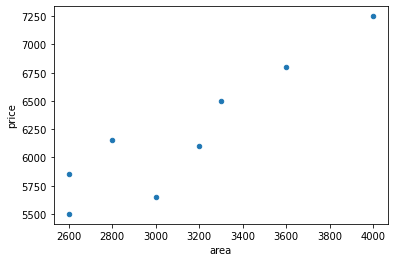

In [68]:
df.plot.scatter(x="area", y="price")

## Clean data (one hot encoding, etc.)

In [69]:
dummies = pd.get_dummies(df["town"])
dummies

,chennai,delhi,kolkata,mumbai
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,0,0,1,0


In [70]:
df = pd.concat([df,dummies], axis="columns")
df

,town,area,price,chennai,delhi,kolkata,mumbai
0,delhi,2600,5500,0,1,0,0
1,delhi,3000,5650,0,1,0,0
2,mumbai,3200,6100,0,0,0,1
3,mumbai,3600,6800,0,0,0,1
4,chennai,4000,7250,1,0,0,0
5,chennai,2600,5850,1,0,0,0
6,chennai,2800,6150,1,0,0,0
7,kolkata,3300,6500,0,0,1,0


In [71]:
df = df.drop(["town", "mumbai"], axis="columns")
df

,area,price,chennai,delhi,kolkata
0,2600,5500,0,1,0
1,3000,5650,0,1,0
2,3200,6100,0,0,0
3,3600,6800,0,0,0
4,4000,7250,1,0,0
5,2600,5850,1,0,0
6,2800,6150,1,0,0
7,3300,6500,0,0,1


In [72]:
# Optional (reordering columns)
df.insert(len(df.columns)-1,"price", df.pop("price"))
df

,area,chennai,delhi,kolkata,price
0,2600,0,1,0,5500
1,3000,0,1,0,5650
2,3200,0,0,0,6100
3,3600,0,0,0,6800
4,4000,1,0,0,7250
5,2600,1,0,0,5850
6,2800,1,0,0,6150
7,3300,0,0,1,6500


## Create model


In [73]:
mymodel = LinearRegression()

In [74]:
X = df.drop("price", axis="columns")
X

,area,chennai,delhi,kolkata
0,2600,0,1,0
1,3000,0,1,0
2,3200,0,0,0
3,3600,0,0,0
4,4000,1,0,0
5,2600,1,0,0
6,2800,1,0,0
7,3300,0,0,1


In [75]:
Y = df["price"]
Y

0    5500
1    5650
2    6100
3    6800
4    7250
5    5850
6    6150
7    6500
Name: price, dtype: int64

In [76]:
mymodel.fit(X,Y)

LinearRegression()

In [77]:
mymodel.predict([[2800,0,1,1]])

array([5723.21428571])

In [78]:
mymodel.score(X,Y)

0.9666666666666666